It is an Optimization algorithm

sklearn uses OLS as Gradient Descent

if slope = -ve  increment in c

if slope = +ve  decrement in c

$$c_{new}\;=\;c_{old}\;-\;\eta*slope$$

$$m_{new}\;=\;m_{old}\;-\;\eta*slope$$

$where\;\;\eta*slope\;\longrightarrow\;step-size$

$$slope\;=\;-2 * \sum_{i=1}^{n} (y\;-\hat y)$$

$$slope\;=\;-2 * \sum_{i=1}^{n} (y_i\;-\;mx_i\;-\;c)$$

The values will keep on updating as much the epochs is provided.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples = 4, n_features = 1, n_informative = 1, n_targets = 1, noise = 80, random_state=13)

In [4]:
import matplotlib.pyplot as plt

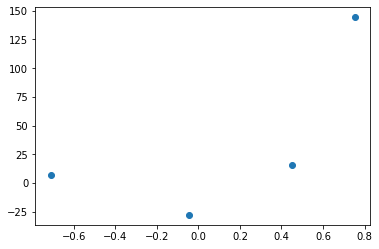

In [5]:
plt.scatter(X,y)

#### Applying OLS

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()

In [8]:
reg.fit(X,y)

LinearRegression()

In [9]:
reg.coef_

array([78.35063668])

In [10]:
reg.intercept_

26.15963284313262

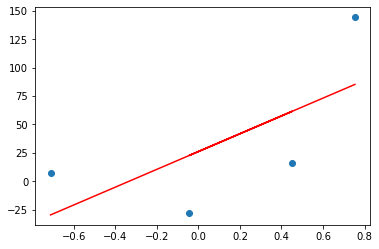

In [11]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red')

#### making own regression line

need to bring intercept closer to OLS intercept which is 26.15963284313262

In [12]:
# checking random value of c and making it closer to OLS line while changing it everytime.
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept c = 0

y_pred = ((78.35 * X) + 0).reshape(4)

<function matplotlib.pyplot.show(close=None, block=None)>

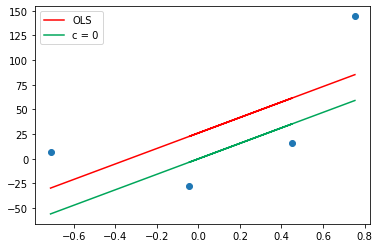

In [13]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X),color ='red', label = 'OLS')
plt.plot(X,y_pred, color = '#00a65a',label = 'c = 0')
plt.legend()
plt.show

intercept(c) for red line (OLS) is 26.15

In [14]:
m = 78.35
c = 0

# slope at c = 0
loss_slope = -2 * np.sum(y - m*X.ravel() - c)
loss_slope

-209.27763408209216

In [15]:
# lets take learning rate = 0.1

lr = 0.1

step_size = loss_slope * lr
step_size

-20.927763408209216

In [16]:
# calculating the new intercept
# c_new = c_old - step_size

c = c - step_size
c

# we jumped from 0 to 20.927

20.927763408209216

In [17]:
y_pred1 = ((78.35 * X) + c).reshape(4)

In [18]:
y_pred1

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

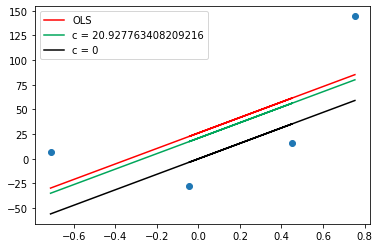

In [19]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red', label = 'OLS')
plt.plot(X,y_pred1, color = '#00a65a', label = 'c = {}'.format(c))
plt.plot(X,y_pred, color = 'black', label = 'c = 0')
plt.legend()
plt.show()

#### Iteration 2
#### doing it again to bring the intercept closer to the intercept of OLS line (26.15963284313262)
##### our "c" is right now 20.927763408209

In [20]:
loss_slope = -2 * np.sum(y - m*X.ravel() - c)
loss_slope

-41.85552681641843

In [21]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [22]:
c = c - step_size
c

25.11331608985106

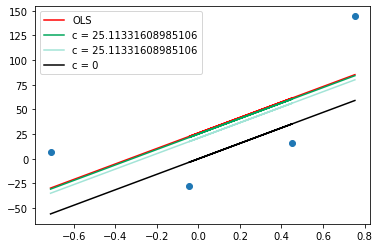

In [23]:
y_pred2 = ((78.35 * X) + c).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='c = {}'.format(c))
plt.plot(X,y_pred1,color='#A3E4D7',label='c = {}'.format(c))
plt.plot(X,y_pred,color='black',label='c = 0')
plt.legend()
plt.show()

#### Iteration 3
#### doing it again to bring the intercept closer to the intercept of OLS line (26.15963284313262)
##### our "c" is right now 25.11331608985106

In [24]:
loss_slope = -2 * np.sum(y - m*X.ravel() - c)
loss_slope

-8.371105363283675

In [25]:
step_size = loss_slope*lr
step_size

-0.8371105363283675

In [26]:
c = c - step_size
c

25.95042662617943

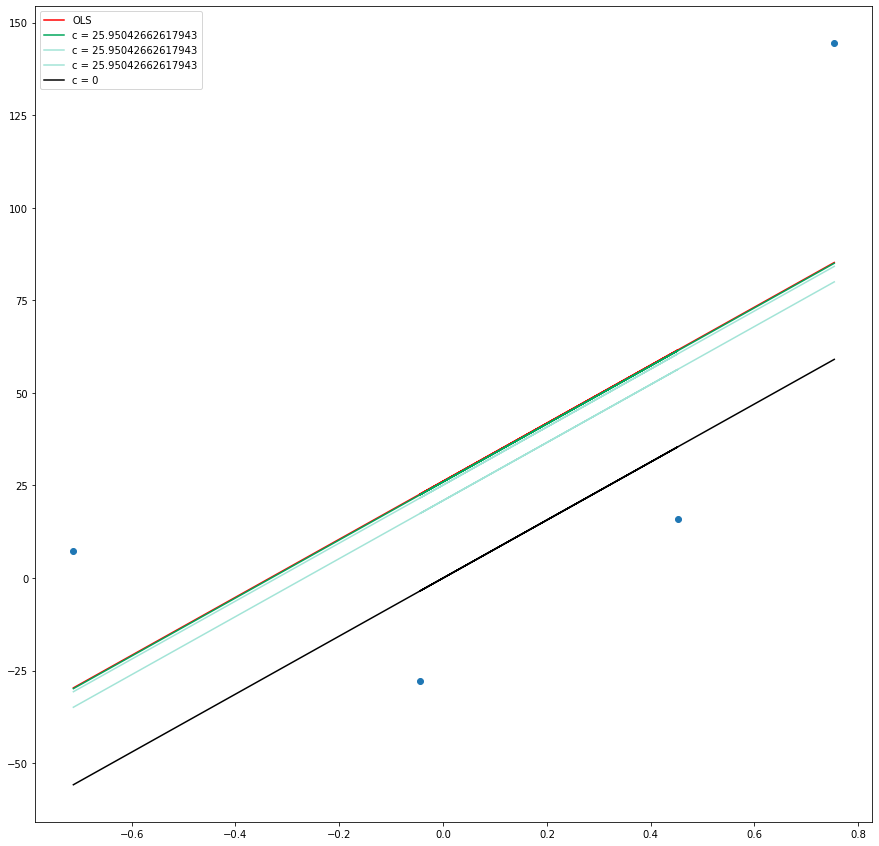

In [27]:
y_pred3 = ((78.35 * X) + c).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='c = {}'.format(c))
plt.plot(X,y_pred2,color='#A3E4D7',label='c = {}'.format(c))
plt.plot(X,y_pred1,color='#A3E4D7',label='c = {}'.format(c))
plt.plot(X,y_pred,color='black',label='c = 0')
plt.legend()
plt.show()

### doing the same iteration process in loop

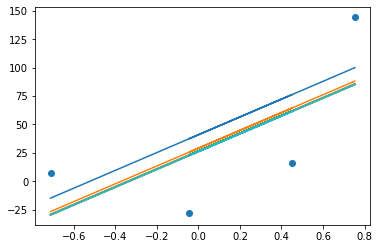

In [28]:
# let initial c = 100
# keeping m fixed at 78.35 and changing c at each iteration
c = 100
m = 78.35
lr = 0.1

epochs = 10

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - c)
    c = c - (lr * loss_slope)
    
    y_pred = m * X + c
    
    plt.plot(X,y_pred)
    
plt.scatter(X,y)


##### keeping learning rate as 0.01 instead of 0.1 and chaning epochs to 100

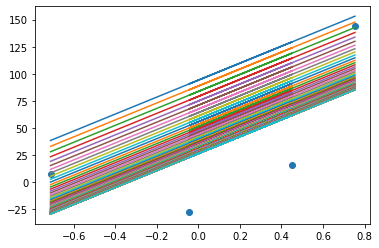

In [29]:
# let initial c = 100
# keeping m fixed at 78.35 and changing c at each iteration
c = 100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - c)
    c = c - (lr * loss_slope)
    
    y_pred = m * X + c
    
    plt.plot(X,y_pred)
    
plt.scatter(X,y)

### creating our own class of Gradient Descent

In [30]:
from sklearn.datasets import make_regression

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [32]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20,random_state=13)

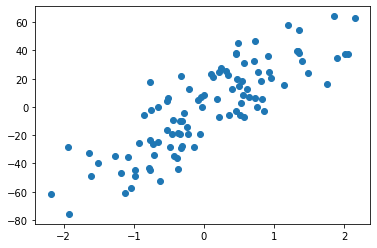

In [33]:
plt.scatter(X,y)

#### first applying scikit learn Gradient Decent to get the values

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X,y)

LinearRegression()

In [37]:
print(lr.intercept_) # c
print(lr.coef_) # m

-2.29474455867698
[27.82809103]


#### fixing value of m and changing c each time

In [38]:
m = 27.82

In [39]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        
        self.m = 27.82
        self.c = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calculate c using Gradient descent
        
        for i in range(self.epochs):  # loop epoch times chalega
            loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.c) # slope of loss function
            
            # updating value of c each time inside loop
            self.c = self.c - (self.lr * loss_slope) 
            
        print(self.c)
            
            
            

In [40]:
gd = GDRegressor(0.1, 10)

# learning rate = 0.1
# epochs = 10

In [41]:
gd.fit(X,y)

# according to my model intercept is -721661617397534.1 because learning rate is too high


-721661617397534.1


In [42]:
# chaning learning rate
gd = GDRegressor(0.01, 10)

gd.fit(X,y)

-119.99999999999997


In [43]:
# chaning learning rate and epochs
gd = GDRegressor(0.001, 100)

gd.fit(X,y)

-2.2942720065528746


**so from the sklearn model we got intercept as -2.2947 and our model is getting intercept as -2.294272 at learning rate =0.001 and epochs = 100**

### now calculating m and c (Actual gradient Descent)
#### not keeping m constant

In [44]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [45]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

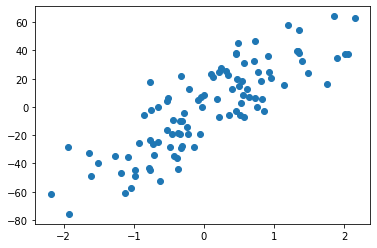

In [46]:
plt.scatter(X,y)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.271014426178382


In [52]:
y_pred = lr.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661013

$$\frac{dr}{dm}\;=\;\sum_{i=1}^{n}\;-2x\;(y - mx - c)$$

$$\frac{dr}{dc}\;=\;\sum_{i=1}^{n}\;-2\;(y - mx - c)$$

In [54]:
# initializing random value of m and c

In [55]:
class GDNewRegressor:
    
    def __init__(self,learning_rate,epochs):
        
        self.m = 100
        self.c = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        
        #calculate the c using GD
        for i in range(self.epochs):
            
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.m)*X.ravel()) # loss slope wrt m
            loss_slope_c = -2 * np.sum(y - self.m*X.ravel() - self.c)   # loss slope wrt c
            
            self.m = self.m - (self.lr * loss_slope_m)
            self.c = self.c - (self.lr * loss_slope_c)
            
    def predict(self,X):
        return self.m * X + self.c

In [56]:
gd = GDNewRegressor(0.001,1500)

In [57]:
gd.fit(X_test,y_test)

In [58]:
y_pred = gd.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6255759821003308

In [60]:
gd.m

21.97909086609577

In [61]:
gd.c

-1.9268197446004984

***

***

In [62]:
from sklearn.datasets import make_regression

import numpy as np
import matplotlib.pyplot as plt

In [63]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [64]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

<IPython.core.display.Javascript object>


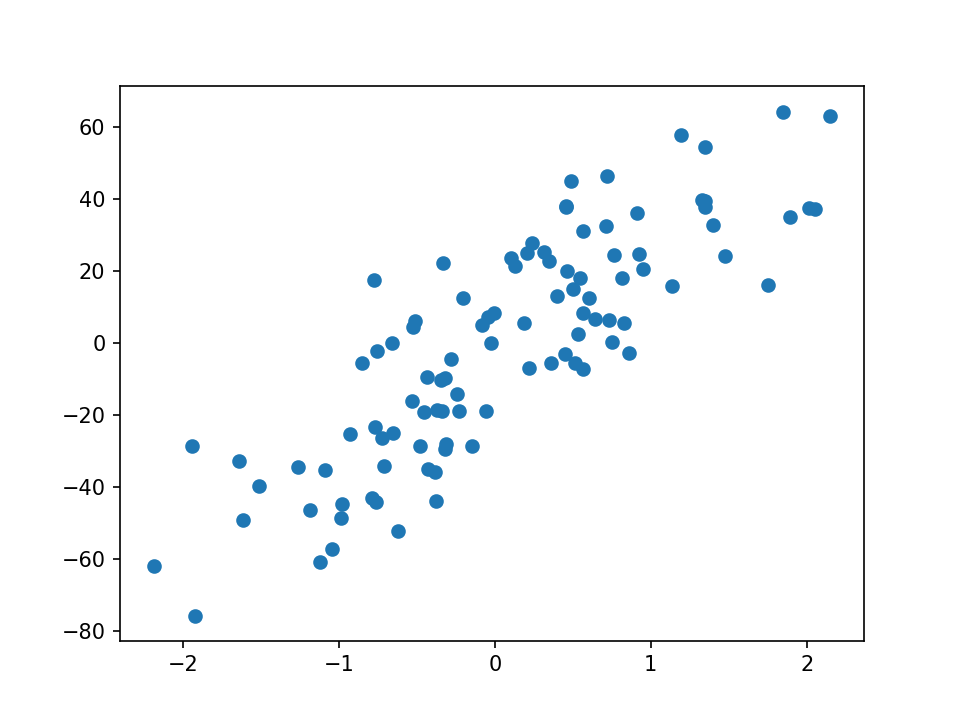

In [65]:
plt.scatter(X,y)

In [66]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

<IPython.core.display.Javascript object>


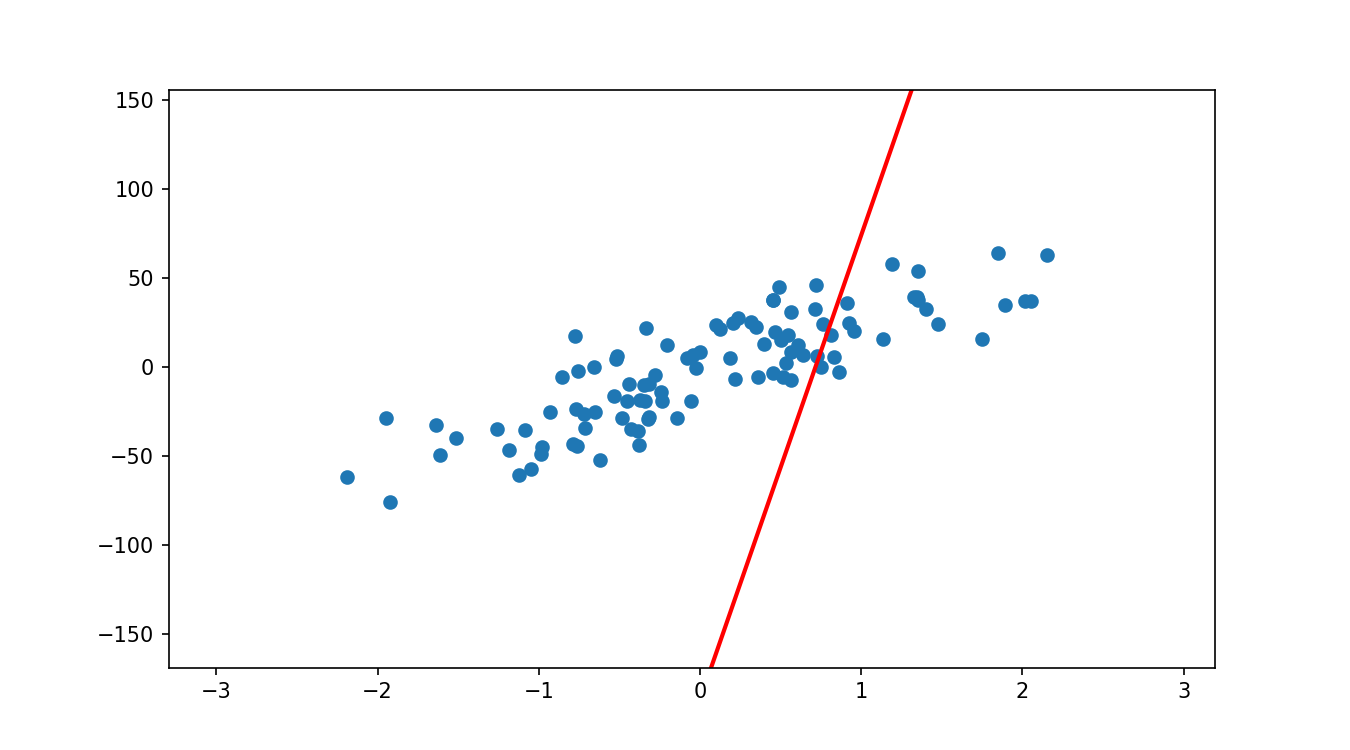

In [67]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)


<IPython.core.display.Javascript object>


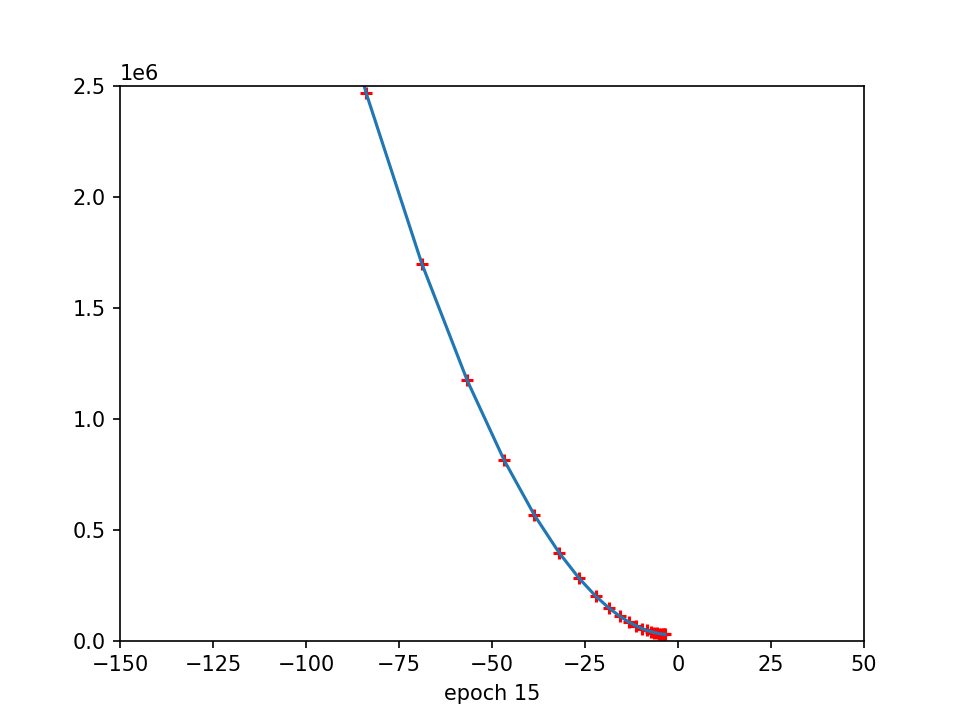

In [68]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.plot(all_b, all_cost)
x, y = [],[]
sc = ax.scatter(x,y,color='red',marker='+')
plt.xlim(-150,50)
plt.ylim(0,2500000)

def animate(i):
    label = 'epoch {0}'.format(i + 1)
    x.append(all_b[i])
    y.append(all_cost[i])
    sc.set_offsets(np.c_[x,y])
    ax.set_xlabel(label)

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=30, interval=500, repeat=True) 
plt.show()

f = r"animation3.gif" 
writergif = animation.PillowWriter(fps=2) 
ani.save(f, writer=writergif)

___

## BATCH GRADIENT DESCENT

Batch Gradient Descent runs data for all value and then updates the m and c once.

It is not useful for very large dataset.

Helpful in Convex functions like Linear Regression.

#### for n-dimensional data


$$Loss\;function\;(wrt\;total\;coefficients)\;for\;n-dim\;data\;\longrightarrow\;\frac{dL}{d\beta_{m}}\;=\;\frac{-2}{n}*\sum_{i=1}^n\;(y_{i}\;-\;\hat y_{i})*x_{im}$$

where $x_{i}$ is the total number of rows

n is total number of independent columns

m is the total number of coefficents

$x_{im}$ is particular coefficent's corresponding columns values

In [69]:
from sklearn.datasets import load_diabetes

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [71]:
X,y = load_diabetes(return_X_y = True)

In [72]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
reg = LinearRegression()

In [75]:
reg.fit(X_train,y_train)

LinearRegression()

In [76]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [77]:
reg.intercept_

151.88331005254167

In [78]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

### Creating Batch Gradient Descent from Scratch

In [79]:
X_train.shape

# 10 columns (9 independent, 1 Dependent )

(353, 10)

In [80]:
class BGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # initialize your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_ # known as VECTORIZATION
            #print("Shape of y_hat",y_hat.shape)
            
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der) # where intercept_der = derivate of loss ftn wrt to intercept(c)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        # print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [81]:
bgdr = BGDRegressor(epochs=1000,learning_rate=0.6)

In [82]:
bgdr.fit(X_train,y_train)

In [83]:
bgdr.coef_

array([   7.81553013, -186.49510734,  506.45449714,  330.72279448,
        -45.79443697, -123.85023287, -193.69457562,   98.53559341,
        470.95977477,   88.65520161])

In [84]:
bgdr.intercept_

151.98879593353988

In [85]:
y_pred = bgdr.predict(X_test)

In [86]:
r2_score(y_test,y_pred)

0.4520736256827782

#### Problem with Batch Gradient Descent.

- For each epochs we look into entire data and update the m and c.

- Number of Computation is too many which make it very slow as derivate is calculated on based of every row and column.

- Hardware issue with big data

### Stochastic Gradient Descent

By looking at single row we update the coefficients resulting in faster convergence.

We dont need to upload entire dataset.

In [87]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

In [88]:
X,y = load_diabetes(return_X_y=True)

In [89]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [92]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [93]:
reg.intercept_

151.88331005254167

In [94]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [95]:
class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]): # this loop will go on as many rows we have
                idx = np.random.randint(0,X_train.shape[0]) # here idx limit is from 0 to total number of rows of train
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat) # multiplying by idx row train i.e. train[idx]
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [96]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

In [97]:
start = time.time()
sgd.fit(X_train,y_train)
print("\nThe time taken is",time.time() - start)

156.61026059573047 [  65.04584506  -47.50936912  315.34801062  228.96256704   32.52547007
   -3.46616988 -167.06156779  135.50912458  289.13532239  126.51648896]

The time taken is 0.23299789428710938


In [98]:
y_pred = sgd.predict(X_test)

In [99]:
r2_score(y_test,y_pred)

0.4170689738311171

In [100]:
from sklearn.linear_model import SGDRegressor

In [101]:
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [102]:
reg.fit(X_train,y_train)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=100)

In [103]:
y_pred = reg.predict(X_test)

In [104]:
r2_score(y_test,y_pred)

0.42607096409559575

#### NOTE: For same epoch value Batch gradient Descent is works better nad faster than Stochastic gradient Descent. 

#### But As Stochastic doesnot need that much epochs values, that why it converges faster.
    

### When to use Stochastic Gradient Descent

1. Big Data -  For large data it will converge faster.


2. Non-Convex Function - A function whose any two points when connected, the connected line cuts the curve of the function.


***

## Mini Batch Gradient Descent

Uses batches for each epochs and updates per epochs.

##### using scikit learn Linear Regression

In [105]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [106]:
X,y = load_diabetes(return_X_y=True)

In [107]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [110]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [111]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

### Creating Mini Batch Gradient Descent from Scratch 

In [112]:
import random

class MBGDRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100): #asking batch size from user
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            for j in range(int(X_train.shape[0]/self.batch_size)):  # ander ka loop will run as much as number of batch is
                
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [113]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)

In [114]:
mbr.fit(X_train,y_train)

152.45016875344555 [  36.49767577 -138.11721825  448.09790379  306.80588334  -24.21478252
  -95.49511487 -190.8995164   107.76723413  409.73627457  116.98231794]


In [115]:
y_pred = mbr.predict(X_test)

In [116]:
r2_score(y_test,y_pred)

0.4518542636169529

### Mini Batch Gradient Descent Using SGDRegressor for Learning Schedule

In [117]:
from sklearn.linear_model import SGDRegressor

In [118]:
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)

In [119]:
batch_size = 35 # index value is 35

for i in range(100): # for epochs = 100
    
    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train[idx],y_train[idx])

In [120]:
sgd.coef_

array([  62.95031882,  -65.24797928,  353.28566402,  246.02648197,
         21.98087815,  -24.28758369, -172.07496515,  136.50648665,
        313.24738517,  129.1043464 ])

In [121]:
sgd.intercept_

array([154.04103359])

In [122]:
y_pred = sgd.predict(X_test)

In [123]:
r2_score(y_test,y_pred)

0.43171709644478373